In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('/home/tt/Downloads/datasets/heart.csv')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [3]:
df.info

<bound method DataFrame.info of      Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
0     40   M           ATA        140          289          0     Normal   
1     49   F           NAP        160          180          0     Normal   
2     37   M           ATA        130          283          0         ST   
3     48   F           ASY        138          214          0     Normal   
4     54   M           NAP        150          195          0     Normal   
..   ...  ..           ...        ...          ...        ...        ...   
913   45   M            TA        110          264          0     Normal   
914   68   M           ASY        144          193          1     Normal   
915   57   M           ASY        130          131          0     Normal   
916   57   F           ATA        130          236          0        LVH   
917   38   M           NAP        138          175          0     Normal   

     MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisea

In [4]:
# missing data
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [5]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [6]:
# checking statistics of the data
df.describe().T.style.background_gradient()

,count,mean,std,min,25%,50%,75%,max
Age,918.000000,53.510893,9.432617,28.000000,47.000000,54.000000,60.000000,77.000000
RestingBP,918.000000,132.396514,18.514154,0.000000,120.000000,130.000000,140.000000,200.000000
Cholesterol,918.000000,198.799564,109.384145,0.000000,173.250000,223.000000,267.000000,603.000000
FastingBS,918.000000,0.233115,0.423046,0.000000,0.000000,0.000000,0.000000,1.000000
MaxHR,918.000000,136.809368,25.460334,60.000000,120.000000,138.000000,156.000000,202.000000
Oldpeak,918.000000,0.887364,1.066570,-2.600000,0.000000,0.600000,1.500000,6.200000
HeartDisease,918.000000,0.553377,0.497414,0.000000,0.000000,1.000000,1.000000,1.000000


In [7]:
df['RestingECG'].value_counts()

Normal    552
LVH       188
ST        178
Name: RestingECG, dtype: int64

In [8]:

df['ChestPainType'].value_counts()

ASY    496
NAP    203
ATA    173
TA      46
Name: ChestPainType, dtype: int64

In [9]:
df['ExerciseAngina'].value_counts()

N    547
Y    371
Name: ExerciseAngina, dtype: int64

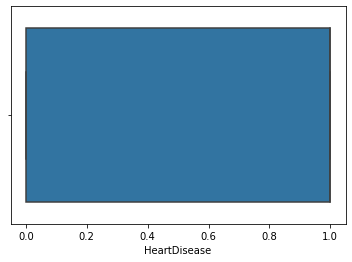

In [10]:
# checking outliers
sns.boxplot(x=df['HeartDisease'])
plt.show()
# there are no outliers

<AxesSubplot:>

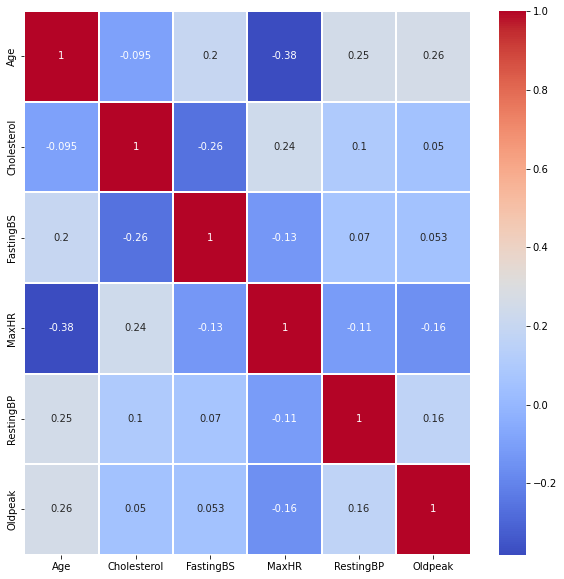

In [11]:
# checking correlation of the named variables
plt.figure(figsize=(10, 10))
sns.heatmap(df[['ChestPainType', 'Age', 'Cholesterol', 'FastingBS', 'MaxHR', 'RestingBP', 'Oldpeak']].corr(), 
annot=True, cmap='coolwarm', linewidths=0.02)
# the highest correlation is between Age and MaxHr which is 0.38
# the lowest being oldpeak and cholesterol which is 0.05, 
# correlation ranges between being 

<Figure size 1008x576 with 0 Axes>

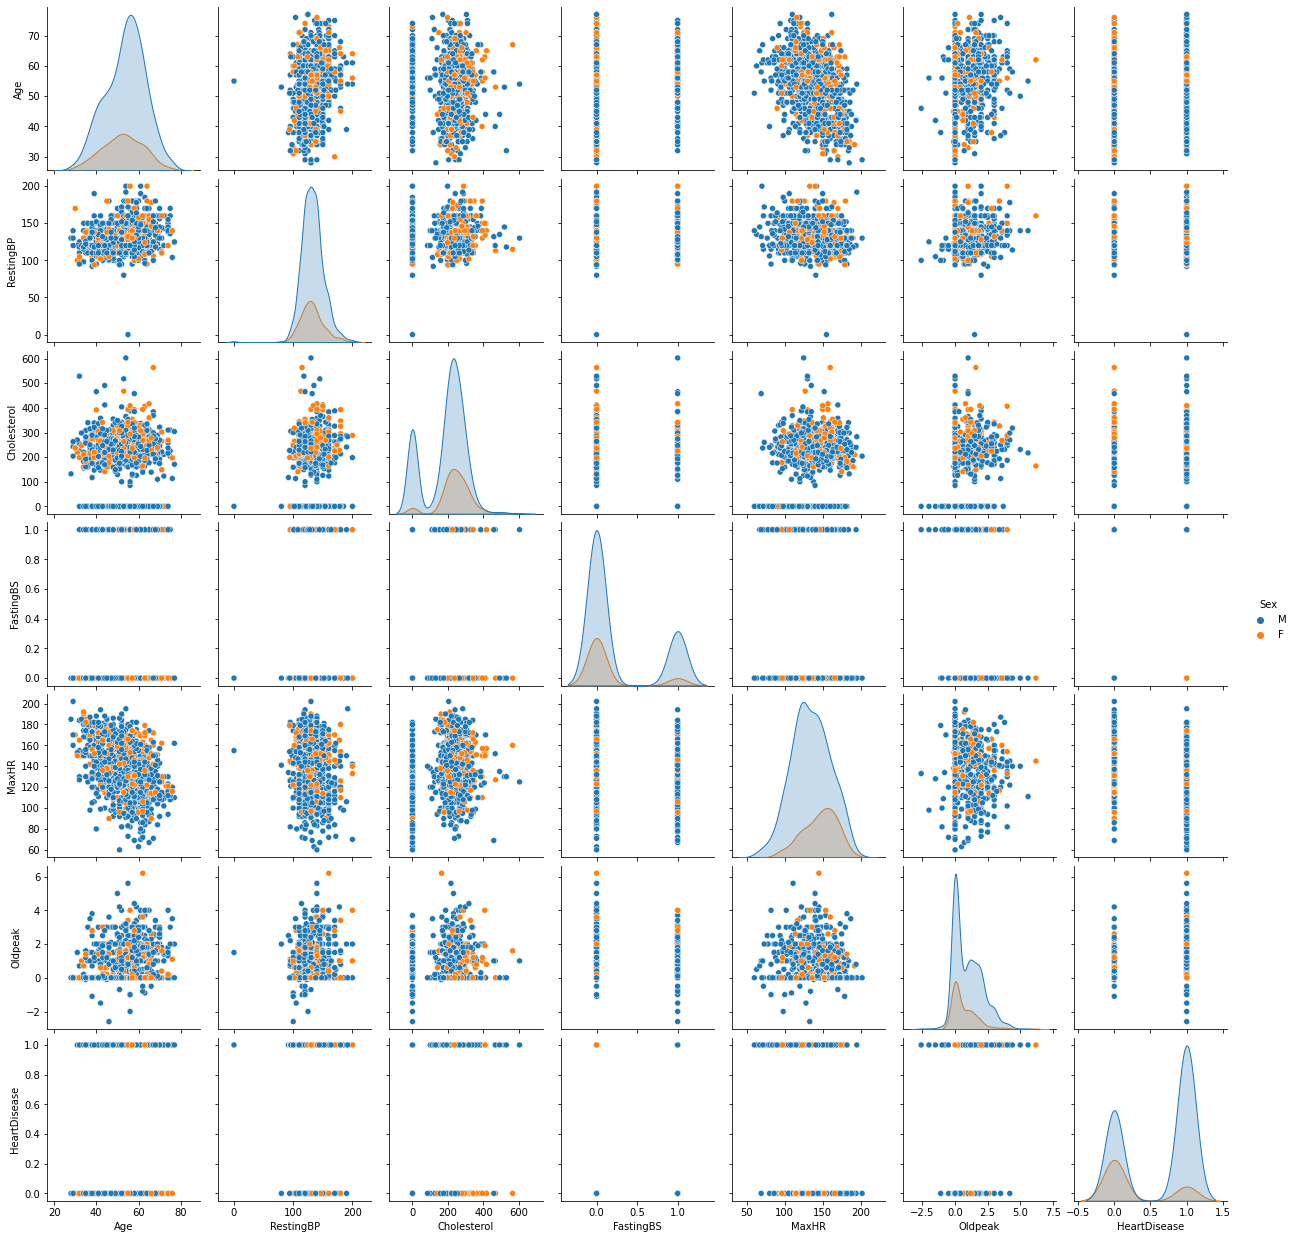

In [12]:
plt.figure(figsize=(14, 8))
sns.pairplot(df, hue='Sex')

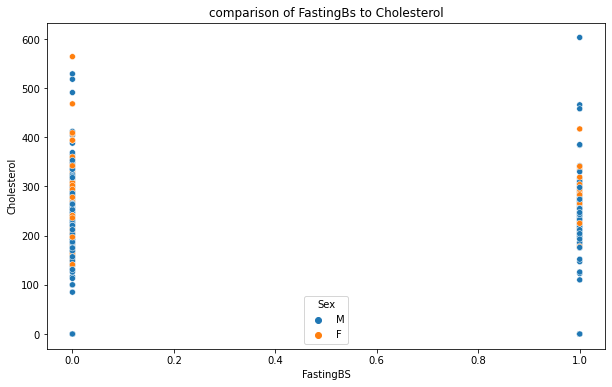

In [13]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='FastingBS', y='Cholesterol',hue='Sex', data=df).set(title='comparison of FastingBs to Cholesterol')
plt.show()
# as cholesterol incraesees so do FastingBs

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'RestingBP'}>,
        <AxesSubplot:title={'center':'Cholesterol'}>],
       [<AxesSubplot:title={'center':'FastingBS'}>,
        <AxesSubplot:title={'center':'MaxHR'}>,
        <AxesSubplot:title={'center':'Oldpeak'}>],
       [<AxesSubplot:title={'center':'HeartDisease'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

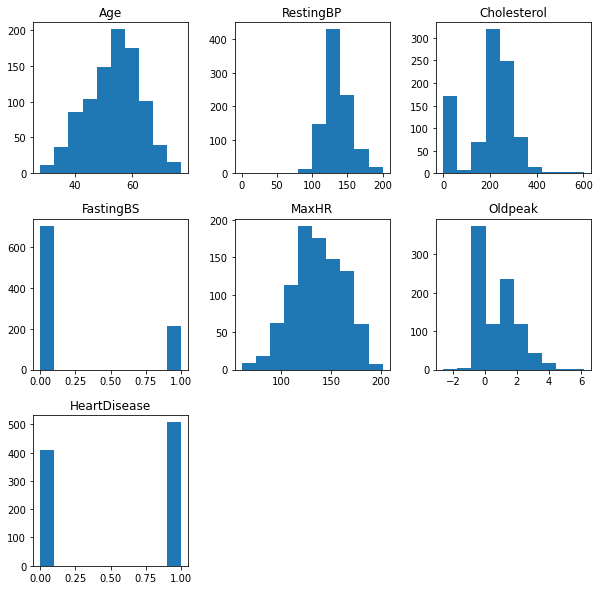

In [14]:
df.hist(bins=10, figsize=(10, 10), grid=False)

In [15]:
#getting dummies of the data
df = pd.get_dummies(df, drop_first=True)
df.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,1,1,0,0,1,0,0,0,1
1,49,160,180,0,156,1.0,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.0,0,1,1,0,0,0,1,0,0,1
3,48,138,214,0,108,1.5,1,0,0,0,0,1,0,1,1,0
4,54,150,195,0,122,0.0,0,1,0,1,0,1,0,0,0,1


In [16]:
# modelling and preprocessing
x= df.drop('HeartDisease', axis=1)
y = df['HeartDisease']
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [17]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=11)
knn.fit(x_train, y_train)
pred = knn.predict(x_test)

In [18]:
from sklearn.metrics import classification_report
print(classification_report(pred, y_test))

              precision    recall  f1-score   support

           0       0.77      0.86      0.81        83
           1       0.91      0.86      0.88       147

    accuracy                           0.86       230
   macro avg       0.84      0.86      0.85       230
weighted avg       0.86      0.86      0.86       230



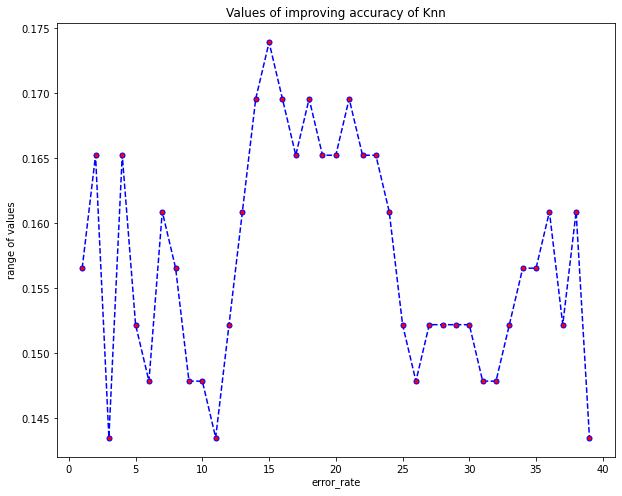

In [19]:
# finding the best input for n_neighbor to deliver a better accuracy
error_rate = []
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    pred1 = knn.predict(x_test)
    error_rate.append(np.mean(pred1 != y_test))
plt.figure(figsize=(10, 8))
plt.plot(range(1, 40), error_rate, markersize=5, markerfacecolor='red', linestyle='dashed', color='blue', marker='o')
plt.xlabel('error_rate')
plt.ylabel('range of values')
plt.title('Values of improving accuracy of Knn')
plt.show()